<a href="https://colab.research.google.com/github/Akhorramrouz/CS461/blob/main/decision_trees_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌳 Decision Trees Tutorial
This tutorial walks you through decision trees step by step using Python and scikit-learn.

## 1. Setup

In [1]:
# Install required libraries (Graphviz for visualization)
!pip install graphviz pydotplus


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import graphviz, pydotplus


## 2. Load Example Dataset

In [3]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to dataframe for readability
df = pd.DataFrame(X, columns=iris.feature_names)
df["target"] = y
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 3. Train/Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


## 4. Train a Decision Tree

In [5]:
# Create and fit decision tree
clf = DecisionTreeClassifier(max_depth=3 )
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

## 5. Visualize the Tree

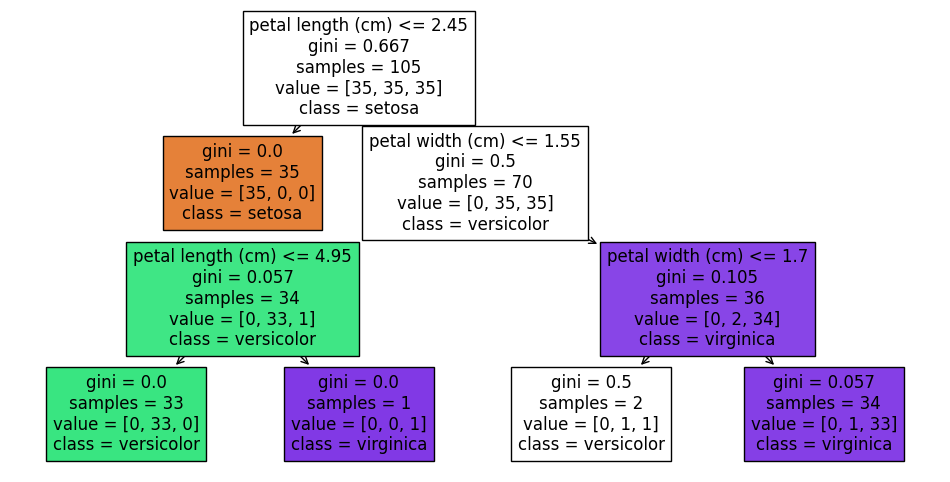

In [6]:
# Simple matplotlib plot
plt.figure(figsize=(12,6))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


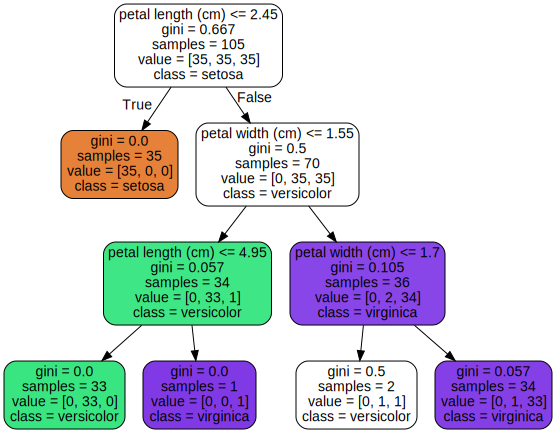

In [7]:
# Graphviz visualization
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph


## 6. Evaluate the Model

In [8]:
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 0.9777777777777777
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## 7. Feature Importance

sepal length (cm): 0.000
sepal width (cm): 0.000
petal length (cm): 0.551
petal width (cm): 0.449


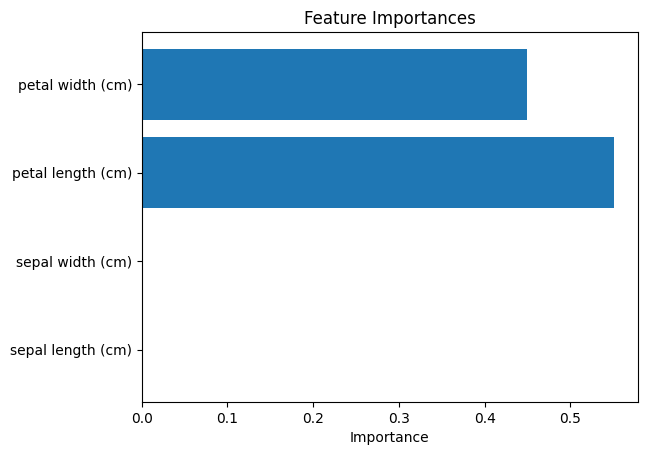

In [9]:
importances = clf.feature_importances_
for name, importance in zip(iris.feature_names, importances):
    print(f"{name}: {importance:.3f}")

plt.barh(iris.feature_names, importances)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()


## 8. Controlling Overfitting

In [10]:
for depth in [2, 3, 5, None]:
    clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    print(f"Depth={depth}, Train Acc={train_acc:.2f}, Test Acc={test_acc:.2f}")


Depth=2, Train Acc=0.97, Test Acc=0.89
Depth=3, Train Acc=0.98, Test Acc=0.98
Depth=5, Train Acc=1.00, Test Acc=0.93
Depth=None, Train Acc=1.00, Test Acc=0.93
